# Lending club case study

### Problem statement:
A consumer finance company specialized in lending various types of loans to urban customers. 
The goal is to identify factors indicating whether a person is likely to default on a loan based on the previous customer datas.

### Approach: 
In addressing the challenge of identifying key factors driving loan default, we'll adopt a systematic approach to pinpoint potential drivers and understand their impact. This is a predictive exploratory analysis focused on determining the variables influencing loan default rather than projecting future outcomes.

### Data Understanding:
We have been given complete loan data for all loans issued through the time period 2007 t0 2011.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

#import datatime module

from datetime import datetime

# Reading and understanding the data

In [2]:
#Importing dataset
df = pd.read_csv("loan.csv")
pd.set_option('display.max_columns', None) # setting the display column to max to show all columns
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data inspection

In [3]:
#Getting the columns for the dataframe
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
# Getting the dimensions i.e. the number of rows and columns of the dataframe
df.shape

(39717, 111)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Observations
* We can see that our dataframe consists of 74 float-type columns, 13 int-type columns and 34 object-type columns
* We can also get a grasp of the statistical outputs of each columns which can perfom statistical computations with the help of describe() method.

# Data cleaning
Data cleaning is the process of identifying and correcting errors, inconsistencies, and inaccuracies in datasets to ensure their reliability and usability for analysis, decision-making, and insights generation, thereby enhancing the quality and credibility of the results obtained from data-driven approaches.

In [7]:
# As we can see from the dataframe, there are multiple columns with all values as NULL/NaN
# The columns are:
columns_with_all_null = df.columns[df.isna().all()].tolist()
print("Columns with its all values as NaN: ")
for count,col in enumerate(columns_with_all_null):
    print(f"{count}. {col} ")


Columns with its all values as NaN: 
0. mths_since_last_major_derog 
1. annual_inc_joint 
2. dti_joint 
3. verification_status_joint 
4. tot_coll_amt 
5. tot_cur_bal 
6. open_acc_6m 
7. open_il_6m 
8. open_il_12m 
9. open_il_24m 
10. mths_since_rcnt_il 
11. total_bal_il 
12. il_util 
13. open_rv_12m 
14. open_rv_24m 
15. max_bal_bc 
16. all_util 
17. total_rev_hi_lim 
18. inq_fi 
19. total_cu_tl 
20. inq_last_12m 
21. acc_open_past_24mths 
22. avg_cur_bal 
23. bc_open_to_buy 
24. bc_util 
25. mo_sin_old_il_acct 
26. mo_sin_old_rev_tl_op 
27. mo_sin_rcnt_rev_tl_op 
28. mo_sin_rcnt_tl 
29. mort_acc 
30. mths_since_recent_bc 
31. mths_since_recent_bc_dlq 
32. mths_since_recent_inq 
33. mths_since_recent_revol_delinq 
34. num_accts_ever_120_pd 
35. num_actv_bc_tl 
36. num_actv_rev_tl 
37. num_bc_sats 
38. num_bc_tl 
39. num_il_tl 
40. num_op_rev_tl 
41. num_rev_accts 
42. num_rev_tl_bal_gt_0 
43. num_sats 
44. num_tl_120dpd_2m 
45. num_tl_30dpd 
46. num_tl_90g_dpd_24m 
47. num_tl_op_past_1

In [8]:
# Droping the unnecessary columns
for col in columns_with_all_null:
    print("Dropping",col)
    df.drop(col,axis=1,inplace=True)

Dropping mths_since_last_major_derog
Dropping annual_inc_joint
Dropping dti_joint
Dropping verification_status_joint
Dropping tot_coll_amt
Dropping tot_cur_bal
Dropping open_acc_6m
Dropping open_il_6m
Dropping open_il_12m
Dropping open_il_24m
Dropping mths_since_rcnt_il
Dropping total_bal_il
Dropping il_util
Dropping open_rv_12m
Dropping open_rv_24m
Dropping max_bal_bc
Dropping all_util
Dropping total_rev_hi_lim
Dropping inq_fi
Dropping total_cu_tl
Dropping inq_last_12m
Dropping acc_open_past_24mths
Dropping avg_cur_bal
Dropping bc_open_to_buy
Dropping bc_util
Dropping mo_sin_old_il_acct
Dropping mo_sin_old_rev_tl_op
Dropping mo_sin_rcnt_rev_tl_op
Dropping mo_sin_rcnt_tl
Dropping mort_acc
Dropping mths_since_recent_bc
Dropping mths_since_recent_bc_dlq
Dropping mths_since_recent_inq
Dropping mths_since_recent_revol_delinq
Dropping num_accts_ever_120_pd
Dropping num_actv_bc_tl
Dropping num_actv_rev_tl
Dropping num_bc_sats
Dropping num_bc_tl
Dropping num_il_tl
Dropping num_op_rev_tl
Dropp

In [9]:
# Checking the newly modified dataframe after dropping unnecessary columns
df.shape

(39717, 57)

In [10]:
# Dropping columns with column values have more than 30% as NaN
for col in df.columns:
    if df[col].isnull().mean()*100 >= 30:
        print("Dropping", col)
        df.drop(col,axis=1,inplace=True)

Dropping desc
Dropping mths_since_last_delinq
Dropping mths_since_last_record
Dropping next_pymnt_d


In [11]:
# Checking the newly modified dataframe again
df.shape

(39717, 53)

In [12]:
# Finding the number of unique values
df.nunique().sort_values().head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
dtype: int64

In [13]:
# Dropping the columns with only one unique value as it has no effect on the analysis
for col in df.columns:
    if df[col].value_counts().count() == 1:
        print("Dropping ",col)
        df.drop(col,axis=1,inplace=True)

Dropping  pymnt_plan
Dropping  initial_list_status
Dropping  collections_12_mths_ex_med
Dropping  policy_code
Dropping  application_type
Dropping  acc_now_delinq
Dropping  chargeoff_within_12_mths
Dropping  delinq_amnt
Dropping  tax_liens


In [14]:
# Checking the dataframe again
df.shape

(39717, 44)

In [15]:
# Member id and url is of no use to for the analysis so it's of no use to the dataset so we're dropping it
df.drop(["member_id","url"],axis=1,inplace=True)

In [16]:
df.shape

(39717, 42)

In [17]:
#Finding number of unique values, printing high unique valued columns
df.nunique().sort_values(ascending=False).head(12)

id                 39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
dtype: int64

Removing **emp_title** and **title** because they contain string values that are more unique values

In [18]:
df.drop(['emp_title', 'title'], axis=1, inplace=True)

In [19]:
df.shape

(39717, 40)

 Removing the features which doesn't have anything to do with loan defaulting

In [20]:
df.drop(["zip_code", "last_credit_pull_d", "addr_state","revol_util","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee","recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis = 1, inplace = True)


In [21]:
df.shape

(39717, 22)

### Fixing rows
We cannot tell or predict anything for the current loans so removing them

In [22]:
df = df[df.loan_status != "Current"]
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [24]:
# Since most of the values are 0 we can replace the missing values with mode
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])

In [25]:
df.loc[df['emp_length'].isna()]['emp_length']

168      NaN
323      NaN
394      NaN
422      NaN
439      NaN
        ... 
32591    NaN
32608    NaN
32621    NaN
32631    NaN
32665    NaN
Name: emp_length, Length: 1033, dtype: object

In [26]:
# We cannot impute the emp_length so we're filling it with:
df.emp_length = df.emp_length.fillna("-1 years")

In [27]:
df.isnull().sum().sum()

0

There are now no missing values

### Standardising values

In [28]:
# Rounding the decimal points by 2 points for better understanding
for col in df.columns:
    if df[col].dtype == float:
        df[col] = df[col].round(2).apply(lambda x : float(x))
        print("Rounding column :",col)

Rounding column : funded_amnt_inv
Rounding column : installment
Rounding column : annual_inc
Rounding column : dti
Rounding column : pub_rec_bankruptcies


Converting datatypes of few columns

In [29]:
df.funded_amnt_inv = df.funded_amnt_inv.round(0).apply(lambda x : int(x))
df.funded_amnt_inv.value_counts()

funded_amnt_inv
5000     1295
10000    1264
6000     1182
12000    1016
8000      887
         ... 
14382       1
19643       1
17061       1
11289       1
9196        1
Name: count, Length: 6469, dtype: int64

In [30]:
df.term = df.term.apply(lambda x: int(x.split()[0]))
df.term.value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [31]:
df.int_rate = df.int_rate.apply(lambda x : float(x[:-1]) if x[-1]=="%" else float(x))
df.int_rate.value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [33]:
df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
-1 years     1033
Name: count, dtype: int64

In [34]:
def convert_emp_length_to_int(emp_length):
    arr = emp_length.split()
    if arr[0] == '<':
        return 0
    elif arr[0][-1] == '+':
        return 10
    else:
        return int(arr[0])
    
df.emp_length = df.emp_length.apply(convert_emp_length_to_int)
df.emp_length.value_counts()

emp_length
 10    8488
 0     4508
 2     4291
 3     4012
 4     3342
 5     3194
 1     3169
 6     2168
 7     1711
 8     1435
 9     1226
-1     1033
Name: count, dtype: int64

In [38]:
#converting the annual to int
df.annual_inc = df.annual_inc.apply(lambda x : int(round(x,0)))
df.annual_inc.value_counts()

annual_inc
60000     1466
50000     1030
40000      855
45000      811
30000      808
          ... 
120120       1
58853        1
90696        1
74646        1
27376        1
Name: count, Length: 5177, dtype: int64

In [39]:
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.apply(lambda x : int(x))
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0    36935
1     1637
2        5
Name: count, dtype: int64

In [41]:
df.issue_d.value_counts()

issue_d
Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [42]:
df['issue_d_month'] = df.issue_d.apply(lambda x : datetime.strptime(x[:3], '%b').month)
df['issue_d_year'] = df.issue_d.apply(lambda x : int(x[-2:]))
df.drop('issue_d',axis=1,inplace=True)

In [43]:
# Converting the loan status to True or False for better understanding
df.loan_status.apply(lambda x : True if x == "Charged Off" else False).value_counts()

loan_status
False    32950
True      5627
Name: count, dtype: int64

In [44]:
df['defaulted'] = df.loan_status.apply(lambda x : True if x == "Charged Off" else False)

In [45]:
df.drop("loan_status",axis=1,inplace=True)

# Univariate analysis

In [46]:
df.shape

(38577, 23)

In [47]:
df.nunique()

id                      38577
loan_amnt                 870
funded_amnt_inv          6469
term                        2
int_rate                  370
installment             15022
grade                       7
sub_grade                  35
emp_length                 12
home_ownership              5
annual_inc               5177
verification_status         3
purpose                    14
dti                      2853
earliest_cr_line          524
inq_last_6mths              9
open_acc                   40
pub_rec                     5
total_acc                  82
pub_rec_bankruptcies        3
issue_d_month              12
issue_d_year                5
defaulted                   2
dtype: int64

In [48]:
# Continuous variable list
cont_var=[]
for col in df.columns:
    if df[col].nunique() > 35 and (df[col].dtype == np.int64 or df[col].dtype == np.float64):
        cont_var.append(col)
cont_var

['id',
 'loan_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'total_acc']

In [49]:
# Categorical variable list
cate_var=[]
for col in df.columns:
    if df[col].nunique() <= 35 :
        cate_var.append(col)
cate_var

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies',
 'issue_d_month',
 'issue_d_year',
 'defaulted']

In [50]:
df.shape

(38577, 23)

In [55]:
# Code to remove outliers from our dataset
def remove_outliers_df(dataframe):
    outlier_df = dataframe
    for col in dataframe.columns:
        Q1 = np.percentile(dataframe[col], 25,interpolation = 'midpoint')
        Q3 = np.percentile(dataframe[col], 75,interpolation = 'midpoint')
        IQR = Q3 - Q1
        if IQR > 0:
            outlier_df = dataframe[(dataframe[col] > (Q1-1.5*IQR)) & (dataframe[col] < (Q3+1.5*IQR))]
            print("Removing outliers for",col)
    return outlier_df

def remove_outliers_series(series):
    outlier_series = series
    Q1 = np.percentile(series, 25,interpolation = 'midpoint')
    Q3 = np.percentile(series, 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    if IQR > 0:
        outlier_series = series[(series > (Q1-1.5*IQR)) & (series < (Q3+1.5*IQR))]
        print("Removing outliers for",col)
    return outlier_series

#### For loan amount

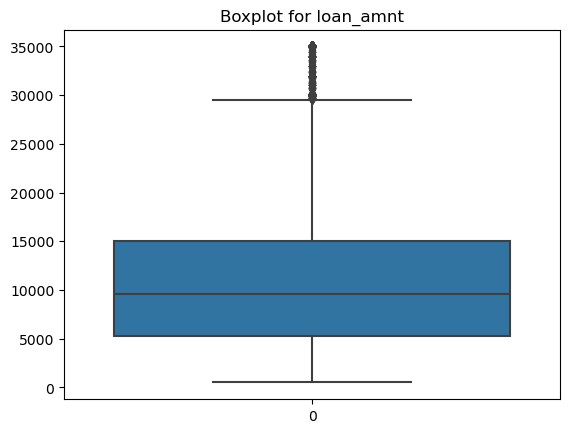

In [54]:
sns.boxplot(df['loan_amnt'])
plt.title("Boxplot for loan_amnt")
plt.show()

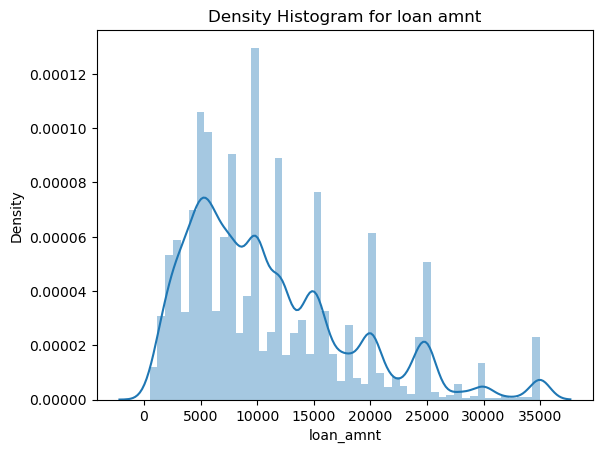

In [56]:
sns.distplot(df['loan_amnt'])
plt.title("Density Histogram for loan amnt")
plt.show()

In [57]:
df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Observations
* most of the loans lie between the amount 5300 and 15000
* The mean is 11047 and median is 9600

#### For funded amount invested

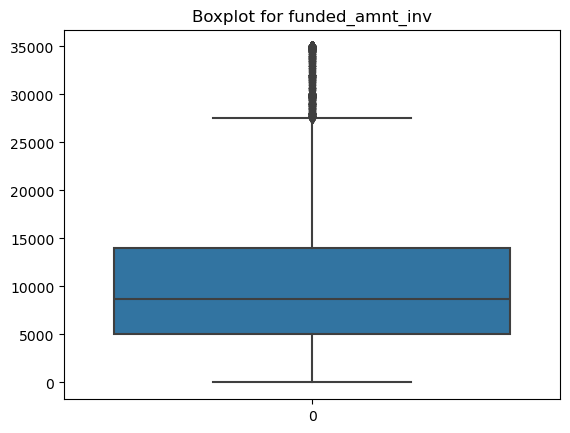

In [60]:
sns.boxplot(df['funded_amnt_inv'])
plt.title("Boxplot for funded_amnt_inv")
plt.show()

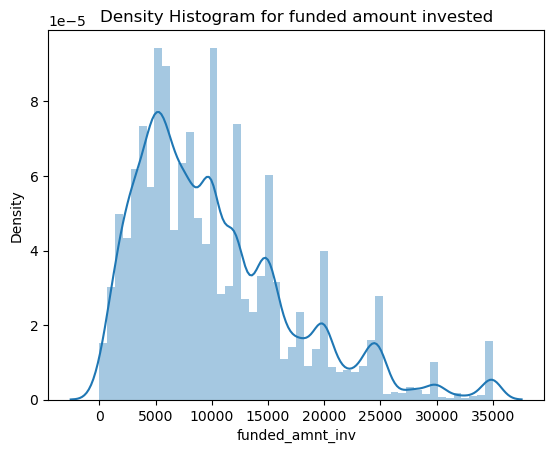

In [62]:
sns.distplot(df['funded_amnt_inv'])
plt.title("Density Histogram for funded amount invested")
plt.show()

In [65]:
df['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.480753
std       7022.721495
min          0.000000
25%       5000.000000
50%       8733.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

#### Observations:
* Most of the amount lended lie between 5000 to 14000
* Mean amount lended is 10223 and Median is 8733

#### For interest rate on loan

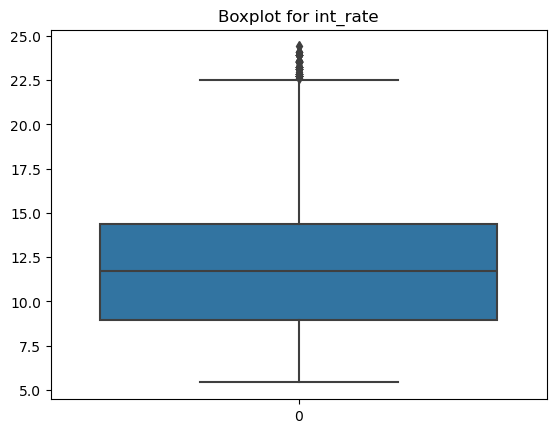

In [66]:
sns.boxplot(df['int_rate'])
plt.title("Boxplot for int_rate")
plt.show()

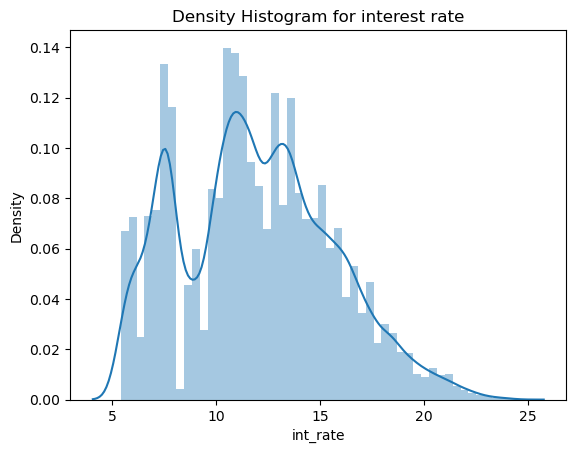

In [68]:
sns.distplot(df['int_rate'])
plt.title("Density Histogram for interest rate")
plt.show()

In [69]:
df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

#### Observations:
* Most of the interest rate lie between 8.94 and 14.38
* Mean is 11.93 and median is 11.71

#### For installment

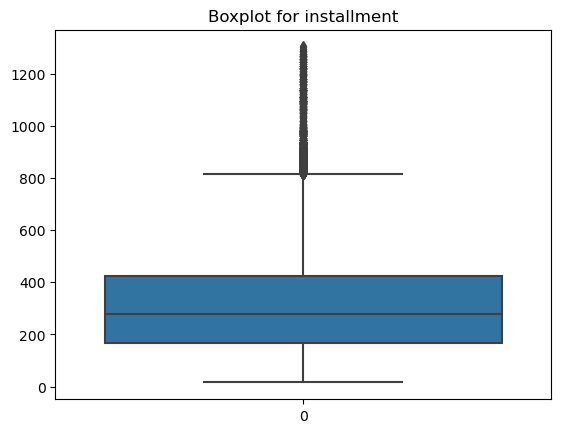

In [70]:
sns.boxplot(df['installment'])
plt.title("Boxplot for installment")
plt.show()

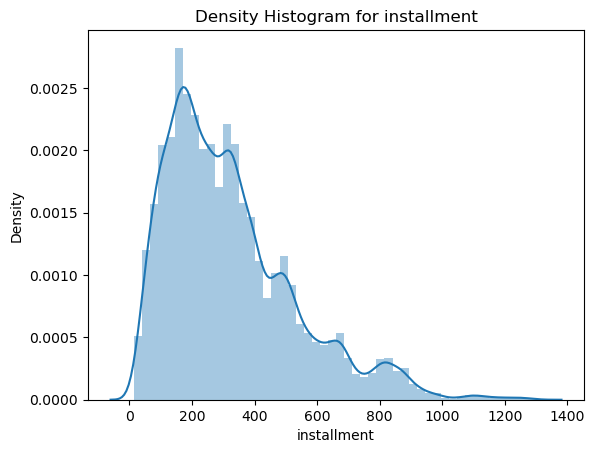

In [71]:
sns.distplot(df['installment'])
plt.title("Density Histogram for installment")
plt.show()

In [72]:
df['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

#### Observations:
* Most of the installments lie between 165.74 and 425.55
* Mean installment is 322.466 and median is 277.86

#### For dti

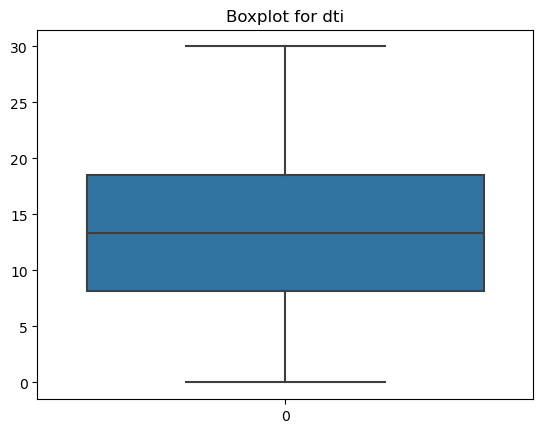

In [74]:
sns.boxplot(df['dti'])
plt.title("Boxplot for dti")
plt.show()

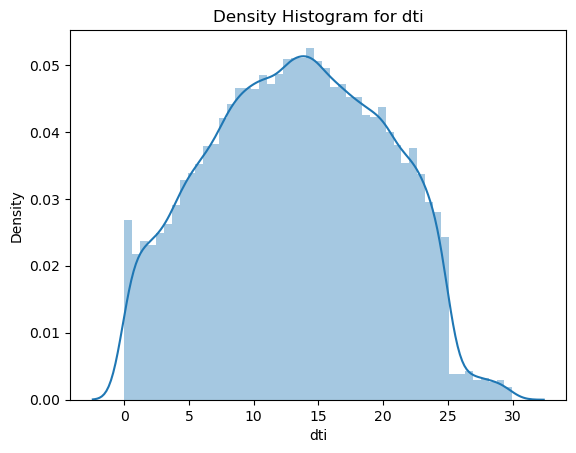

In [75]:
sns.distplot(df['dti'])
plt.title("Density Histogram for dti")
plt.show()

In [76]:
df['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

#### Observations:
* Most of the dti lie between 8.13 and 18.56
* Mean is 13.27 and median is 13.37

### Univariate Analysis for Categorical Variables

In [83]:
print("Defaulted percentage: ")
default = df[df.defaulted == True].defaulted.count()/df.defaulted.count()*100
default

Defaulted percentage: 


14.586411592399617

In [84]:
print("Not defaulted percentage: ")
notdefault = df[df.defaulted == False].defaulted.count()/df.defaulted.count()*100
notdefault

Not defaulted percentage: 


85.41358840760039

Defaulted vs not defaulted

In [79]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

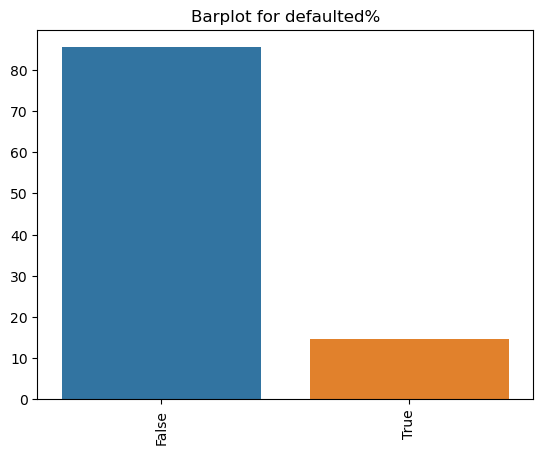

In [85]:
sns.barplot(y = [default,notdefault],orient="v",x=[True,False])
plt.title("Barplot for "+col+"%")
plt.xticks(rotation=90)
plt.show()

In [86]:
print("Other categorical columns: ")
cate_var

Other categorical columns: 


['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies',
 'issue_d_month',
 'issue_d_year',
 'defaulted']

#### Count plot for term


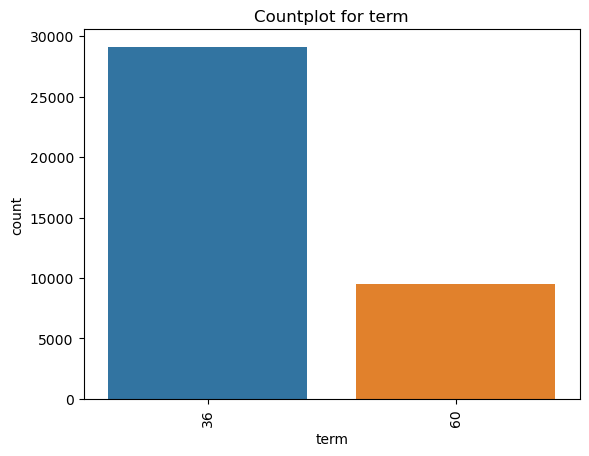

In [88]:
sns.countplot(x=df['term'], order=sorted(df['term'].unique()))
plt.title("Countplot for term")
plt.xticks(rotation=90)
plt.show()

#### Observations:
Less term is more opted for than higher term